# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint 1: expand the squares, and rebuild the quadratic in terms of $\theta$...
### Hint 2: anything that's not $\theta$ is a constant... and you can drop or multiply by any constants you want to complete the square...

# Solution
$$
\newcommand{\divisor}{\left( \tau + n \phi \right)}
\begin{align*}
&\color{white}{\propto}{} \color{black} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{} \exp\left[-\frac{1}{2} \left(\phi \sum_{i=1}^n \left(x_i^2- 2\theta x_i + \theta^2 \right) + \tau\left(\theta^2-2 \theta \theta_0 + \theta_0^2 \right)\right)\right] \\
&\propto{} \exp\left[-\frac{1}{2} \left(\phi \sum_{i=1}^n x_i^2- 2\theta \sum_{i=1}^n x_i + n \phi \theta^2 + \tau \theta^2- 2 \tau \theta \theta_0 + \tau \theta_0^2 \right)\right] \\
&\propto{} \exp\left[-\frac{1}{2} \left(- 2\phi \theta \sum_{i=1}^n x_i + n \phi \theta^2 + \tau \theta^2- 2 \tau \theta \theta_0  \right)\right] \exp \left( -\frac{1}{2} \left(\phi \sum_{i=1}^n x_i^2 + \tau \theta_0^2 \right) \right) \\
&\propto{} \exp\left[-\frac{1}{2} \left(- 2\phi\theta \sum_{i=1}^n x_i + n \phi \theta^2 + \tau \theta^2- 2 \tau \theta \theta_0  \right)\right] \\
&\propto{} \exp\left[-\frac{1}{2} \left(- 2\phi\theta \sum_{i=1}^n x_i + n \phi \theta^2 + \tau \theta^2- 2 \tau \theta \theta_0  \right)\right] \exp \left( \frac{\tau^2 \theta^2 + 2 \tau \phi \theta_0 \sum_{i=1}^n x_i + \phi^2 \sum_{i=1}^n x_i^2 }{\divisor} \right) \\
&\propto{} \exp\left[-\frac{1}{2} \left( (n \phi + \tau) \theta^2 - 2 \left( \phi \sum_{i=1}^n x_i + \tau \theta_0 \right) \theta +  \frac{\tau^2 \theta_0^2 + 2 \tau \phi \theta_0 \sum_{i=1}^n x_i + \phi^2 \sum_{i=1}^n x_i^2 }{\divisor} \right)\right] \\
&\propto{} \exp\left[-\frac{1}{2} \divisor \left(  \theta^2 - \frac{2}{\divisor} \left( \tau \theta_0 + \phi \sum_{i=1}^n x_i \right) \theta +  \frac{\left( \tau \theta_0 + \phi \sum_{i=1}^n x_i \right)^2}{\divisor^2} \right)\right] \\
&\propto{}\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

# The "Classic Bayes" Figure [15 minutes]

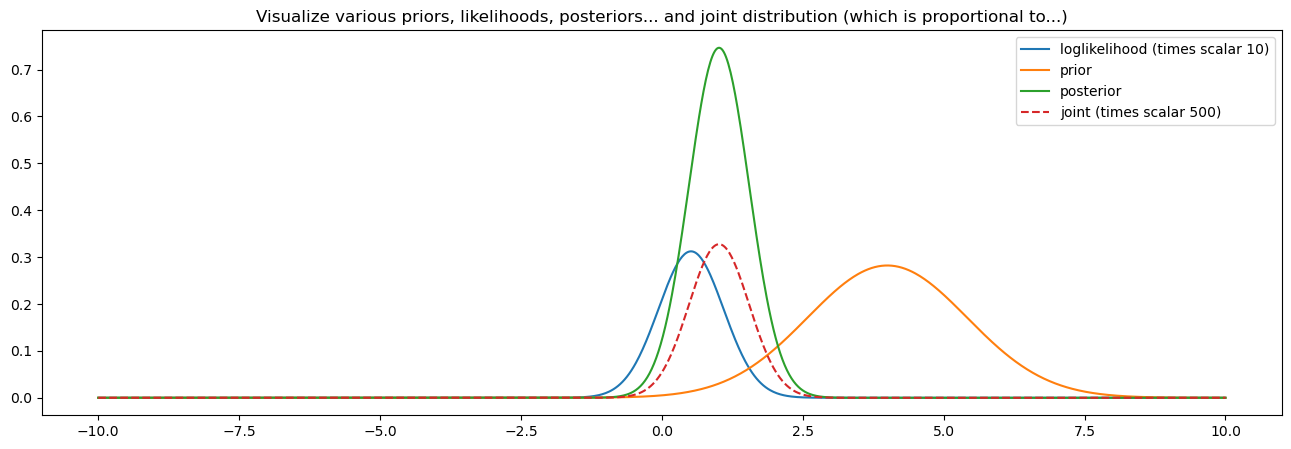

In [1]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

In [2]:
x

array([ 1.48019507,  0.15663829, -0.0845043 ])

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... --> 


Text(0.5, 1.0, 'Individual likelihoods')

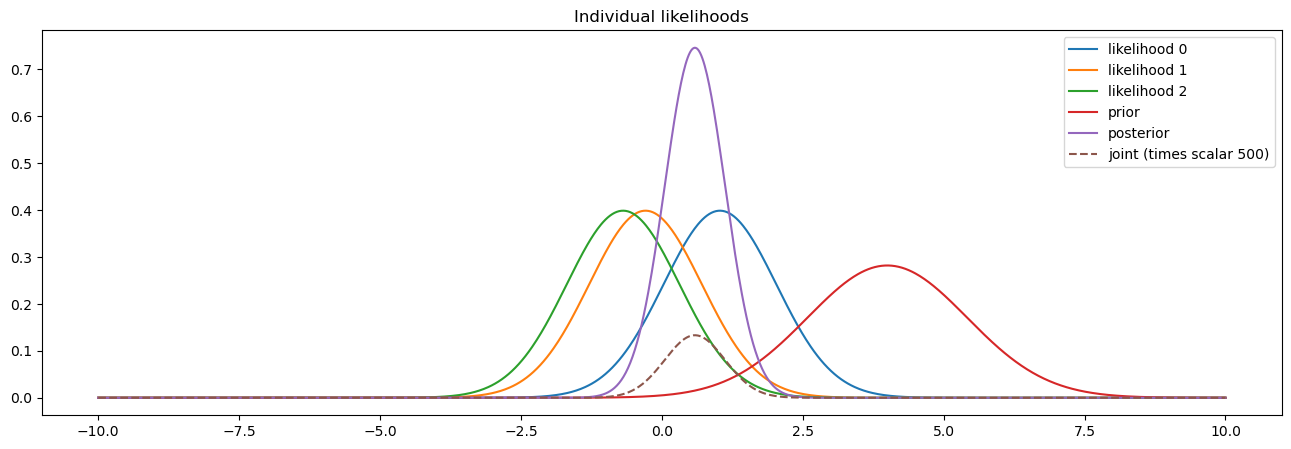

In [16]:
n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c = 500 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5))
for i in range(3):
    likelihood = stats.norm.pdf(parameter_domain, loc=x[i], scale=1) # sigma=1 known
    plt.plot(parameter_domain, c2*likelihood, label=f"likelihood {i}")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Individual likelihoods")

Text(0.5, 1.0, 'Log plot')

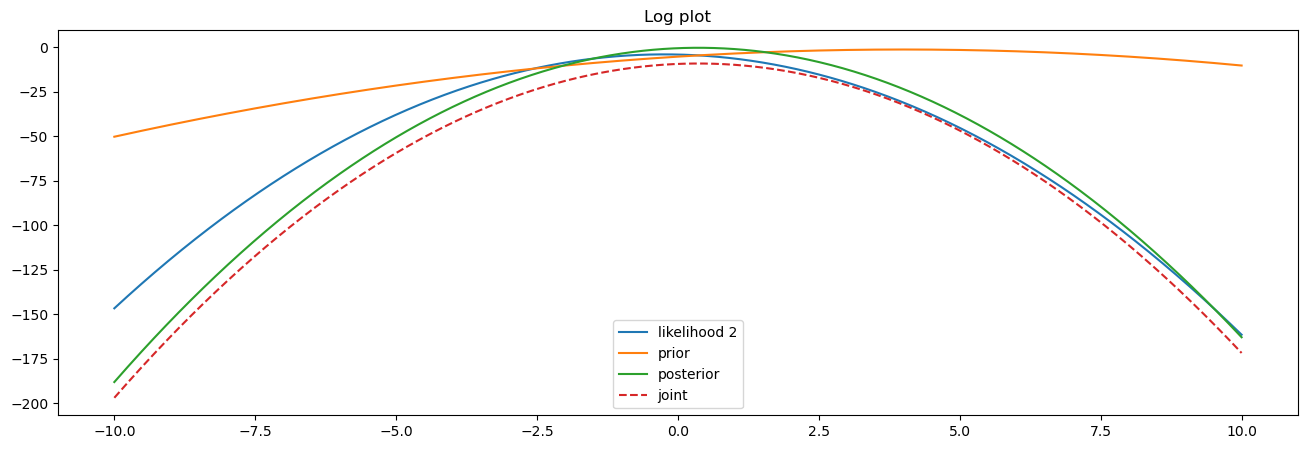

In [21]:
n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
joint = likelihood + prior # elementwise summation
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, c2*likelihood, label=f"likelihood {i}")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint")
plt.legend()
plt.title("Log plot")

# Q3
We know that the posterior relates to the prior and likelihood by the following formula $ p( \theta | x) = \frac{p( x | \theta) p(\theta)}{p(x)} $, we can ignore the normalizing factor to get $ p( \theta | x) \propto p( x | \theta) p(\theta)$. If we, as in the question stated, assume that $p(\theta) \propto 1$, the relationship simplies to $ p( \theta | x) \propto p( x | \theta)$. Thus if we have that $p( x | \theta) \sim N(\mu, \phi)$, then $p( \theta | x) \sim N(\mu, \phi)$. 

# Q4

The log likelihood is purely a function of the data and thus does not depend on the improper prior. The posterior and thus the log posterior both depend on the prior, thus an improper prior will cause the log posterior be incorrect. 
We can relate the two using the formula Log Posterior = Log Likelihood + Log Prior - Log Marginal Likelihood constant

Even if the prior is improper, calculating the Log Marginal Likelihood constant, as it is calculated using the prior, will be able to correct for the improper prior.